In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...


True

In [14]:
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(1000)
print(df.shape)

(568454, 10)
(1000, 10)


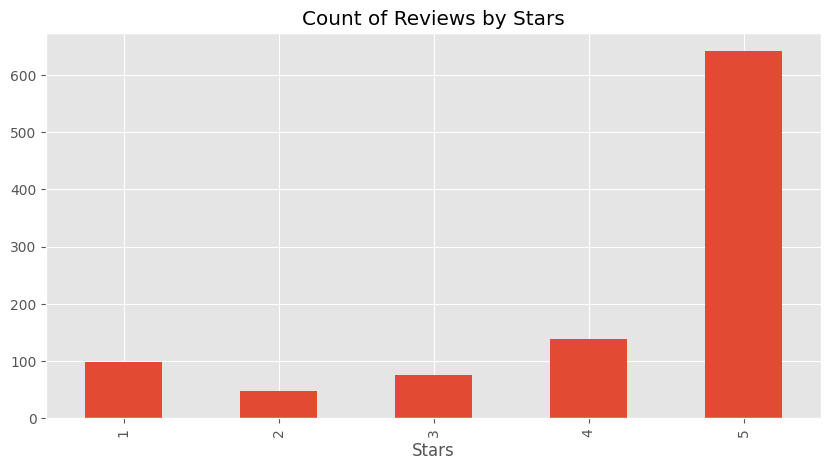

In [20]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Stars', figsize=(10,5))
ax.set_xlabel('Stars')
plt.show()

In [21]:
example = df['Text'][100]
print(example)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.


In [25]:
tokens = nltk.word_tokenize(example)
tokens[:15]

['The',
 'mouth',
 'says',
 ',',
 '``',
 'How',
 'do',
 'I',
 'love',
 'thee',
 ',',
 'let',
 'me',
 'count',
 'the']

In [29]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN')]

In [34]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  mouth/NN
  says/VBZ
  ,/,
  ``/``
  How/WRB
  do/VB
  I/PRP
  love/VB
  thee/NN
  ,/,
  let/VB
  me/PRP
  count/VB
  the/DT
  ways/NNS
  .../:
  ''/''
  </VBZ
  br/NN
  //NNP
  >/NNP
  If/IN
  you/PRP
  like/VBP
  apple/NN
  products/NNS
  a/DT
  must/MD
  have/VB
  item/NN
  ./.
  The/DT
  only/JJ
  draw/NN
  back/RB
  ,/,
  shipping/VBG
  cost/NN
  ./.
  These/DT
  are/VBP
  very/RB
  heavy/JJ
  ./.)


## VADER Sentiment Scoring

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [50]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [61]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [63]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [66]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [68]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


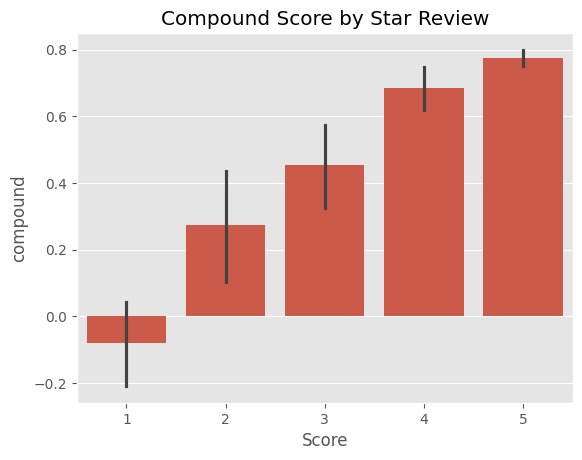

In [70]:
ax = sns.barplot(data=vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Star Review')
plt.show()

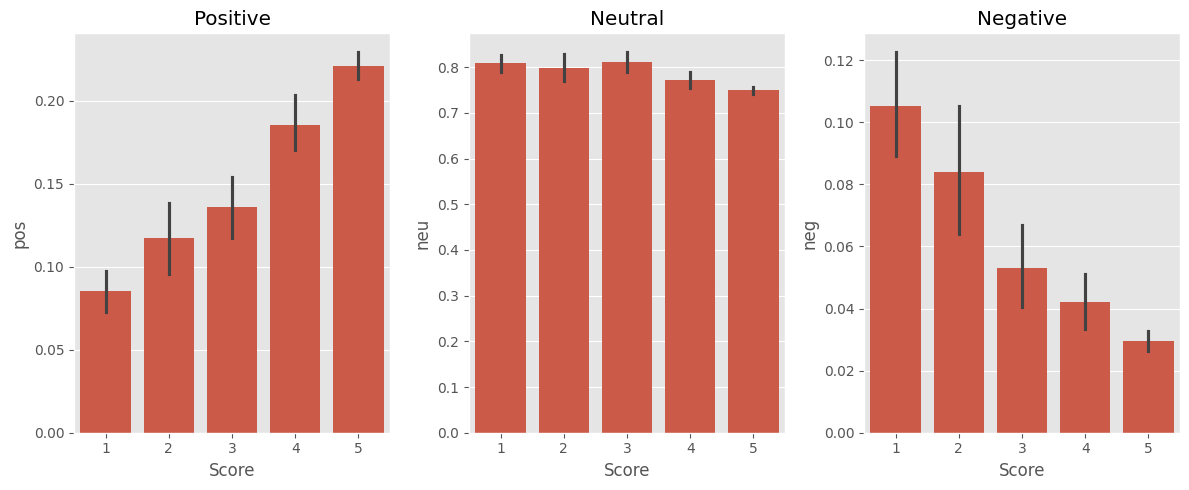

In [74]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()